In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, basename
from glob import glob
import pickle
from scipy.stats import pearsonr
from scipy.signal import periodogram, filtfilt, correlate, correlation_lags
import seaborn as sns
from tqdm import tqdm
from itertools import combinations
from datetime import timedelta

from filtering import freq_filt

sps = 200
banner_coords = (44.3, -115.233)

result_dir = '/bsuscratch/zacharykeskinen/data/infrasound/psd_results'
data_dir = '/bsuscratch/zacharykeskinen/data/infrasound/array_data'
hor_data = join(data_dir, 'ada-horizontal_2')

sps = 200

In [2]:
def norm_correlate(arr1, arr2):
    arr1 = freq_filt(arr1, 1, "highpass")
    arr2 = freq_filt(arr2, 1, "highpass")
    c = correlate((arr1 - np.mean(arr1))/np.std(arr1), (arr2 - np.mean(arr2))/np.std(arr2), 'full') / min(len(arr1), len(arr2))
    l = correlation_lags(arr1.size, arr2.size,)
    return c, l

In [3]:
with open(join(data_dir,'merged', 'horizontal', 'ada2.pkl'), 'rb') as f:
    a = pickle.load(f)

/tmp/ipykernel_27727/3883209207.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  for t1 in tqdm(np.arange(start = a.index.min(), stop = a.index.max() - pd.Timedelta('1.005 second'), step = pd.Timedelta('1.005 second'))):
  0%|          | 409/378218 [02:31<38:22:13,  2.74it/s]

2022-05-04 19:39:14.020000+00:00 2022-05-04 19:39:15.025000+00:00
c2 c3


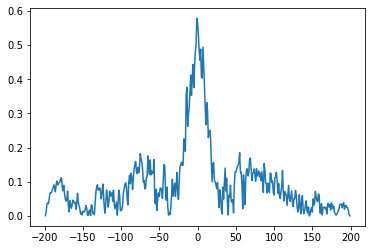

  0%|          | 824/378218 [05:03<38:27:45,  2.73it/s]

: 

: 

In [4]:
step = '1.005 second'
for t1 in tqdm(np.arange(start = a.index.min(), stop = a.index.max() - pd.Timedelta(step), step = pd.Timedelta(step))):
    t1 = pd.Timestamp(t1).tz_localize('UTC')
    t2 = t1 + pd.Timedelta(step)
    sub = a.loc[(a.index < t2) & (a.index > t1)]
    for c1, c2 in combinations(sub.columns, 2):
        c, l = norm_correlate(sub[c1], sub[c2])
        if np.max(c) > 0.5:
            print(t1, t2)
            print(c1, c2)
            plt.plot(l, abs(c))
            plt.show()

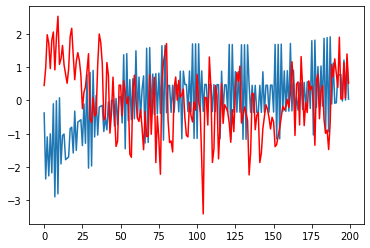

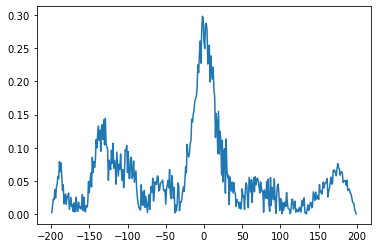

In [185]:
t1 = pd.to_datetime('2022-05-04 T19:49:17.020000+00:00')
t2 = t1 + pd.Timedelta('1.005 seconds')
arr1 = a.loc[(a.index > t1)&(a.index < t2), 'c1']
arr2 = a.loc[(a.index > t1)&(a.index < t2), 'c3']
# arr1 = (arr1 - np.mean(arr1)) / (np.std(arr1) * len(arr1))
# arr2 = (arr2 - np.mean(arr2)) / (np.std(arr2))
# norm_a = np.linalg.norm(arr1)
# arr1 = arr1 /norm_a
# norm_b = np.linalg.norm(arr2)
# arr2 = arr2 /norm_b
arr1 = freq_filt(arr1, 1, 'highpass')
arr2 = freq_filt(arr2, 1, 'highpass')

plt.plot(((arr1 - np.mean(arr1))/np.std(arr1)))
plt.plot(((arr2 - np.mean(arr2))/np.std(arr2)), color = 'red')
plt.show()

# c = correlate(arr1 - np.mean(arr1), arr2- np.mean(arr2), 'full')
c, l = norm_correlate(arr1, arr2)

plt.plot(l, abs(c))
# plt.axvline(lag, color = 'red')
plt.show()